In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(broom))
suppressMessages(library(GGally))
suppressMessages(library(caret))

In [2]:
#facebook_data <- suppressMessages(read_csv("data/facebook_data.csv"))
facebook_data <- suppressMessages(read_csv2("data/dataset_Facebook.csv"))
head(facebook_data)

Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


# Preprocessing

In [3]:
# drop na's
facebook_data <- drop_na(facebook_data)

In [4]:
cleaned_facebook_data <- tibble(
    total_engagement_percentage = facebook_data$`Lifetime Engaged Users` /
      facebook_data$`Lifetime Post Total Reach` * 100,
    page_engagement_percentage = facebook_data$`Lifetime People who have liked your Page and engaged with your post` /
      facebook_data$`Lifetime Post reach by people who like your Page` * 100,
    share_percentage = facebook_data$share / facebook_data$`Total Interactions` * 100,
    comment_percentage = facebook_data$comment / facebook_data$`Total Interactions` * 100,
    post_category = facebook_data$Category,
    paid = factor(facebook_data$Paid),
    type = factor(facebook_data$Type)
)
# Put descriptive text for post_category

cleaned_facebook_data <- cleaned_facebook_data %>%
  mutate(post_category = factor(case_when(
    post_category == 1 ~ "Action",
    post_category == 2 ~ "Product",
    post_category == 3 ~ "Inspiration",
    TRUE ~ "ERROR"))) %>%
  drop_na(.)
print(nrow(cleaned_facebook_data))
head(cleaned_facebook_data)

[1] 490


total_engagement_percentage,page_engagement_percentage,share_percentage,comment_percentage,post_category,paid,type
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
6.468023,7.256098,17.000000,4.0000000,Product,0,Photo
13.929254,18.128272,17.682927,3.0487805,Product,0,Status
7.335267,8.782435,17.500000,0.0000000,Inspiration,0,Photo
4.410709,4.324763,8.272369,3.2639280,Product,1,Photo
9.262838,12.375000,12.468193,4.8346056,Product,0,Photo
11.373186,12.939379,17.741935,0.5376344,Product,0,Status


# The Facebook Dataset

- This dataset is related to posts' critical information on user engagement during 2014 on a Facebook page of a famous cosmetics brand.
- The original dataset contains 500 observations relative to different classes of posts, and it can be found in [data.world](https://data.world/uci/facebook-metrics/workspace/project-summary?agentid=uci&datasetid=facebook-metrics).
- After some data cleaning, it ends up with 491 observations. The dataset was firstly analyzed by [Moro et al. (2016)](https://gw2jh3xr2c.search.serialssolutions.com/log?L=GW2JH3XR2C&D=ADALY&J=JOUROFBUSRE&P=Link&PT=EZProxy&A=Predicting+social+media+performance+metrics+and+evaluation+of+the+impact+on+brand+building%3A+A+data+mining+approach&H=d8c19bb47c&U=https%3A%2F%2Fezproxy.library.ubc.ca%2Flogin%3Furl%3Dhttps%3A%2F%2Fwww.sciencedirect.com%2Fscience%2Flink%3Fref_val_fmt%3Dinfo%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal%26svc_val_fmt%3Dinfo%3Aofi%2Ffmt%3Akev%3Amtx%3Asch_srv%26rfr_dat%3Dsaltver%3A1%26rfr_dat%3Dorigin%3ASERIALSSOL%26ctx_enc%3Dinfo%3Aofi%2Fenc%3AUTF-8%26ctx_ver%3DZ39.88-2004%26rft_id%3Dinfo%3Adoi%2F10.1016%2Fj.jbusres.2016.02.010) in their data mining work to predict the performance of different post metrics, which are also based on the type of post.
- The original dataset has 17 different continuous and discrete variables. 
    - For the simplicity of this project, however, we extracted five variables for `facebook_data` as follows:

1.  The continuous variable `total_engagement_percentage` is an essential variable for any company owning a Facebook page. It gives a sense of how engaged the overall social network's users are with the company's posts, **regardless of whether they previously liked their Facebook page or not**. *The larger the percentage, the better the total engagement*. It is computed as follows:

$$\texttt{total\_engagement\_percentage} = \frac{\text{Lifetime Engaged Users}}{\text{Lifetime Post Total Reach}} \times 100\%$$

-   **Lifetime Post Total Reach:** The number of overall *Facebook unique users* who *saw* the post.
-   **Lifetime Engaged Users:** The number of overall *Facebook unique users* who *saw and clicked* on the post. This count is a subset of **Lifetime Post Total Reach**.

2.  The continuous variable `page_engagement_percentage` is analogous to `total_engagement_percentage`, but only with users who engaged with the post **given they have liked the page**. This variable provides a sense to the company to what extent these subscribed users are reacting to its posts. *The larger the percentage, the better the page engagement*. It is computed as follows:

$$\texttt{page\_engagement\_percentage} = \frac{\text{Lifetime Users Who Have Liked the Page and Engaged with the Post}}{\text{Lifetime Post Reach by Users Who Liked the Page}} \times 100\% $$

-   **Lifetime Post Reach by Users Who Liked the Page:** The number of *Facebook unique page subscribers* who *saw* the post.
-   **Lifetime Users Who Have Liked the Page and Engaged with the Posts:** The number of *Facebook unique page subscribers* who *saw and clicked* on the post. This count is a subset of **Lifetime Post Reach by Users Who Liked the Page**.

3.  The continuous `share_percentage` is the percentage that the number of *shares* represents from the sum of *likes*, *comments*, and *shares* in each post. It is computed as follows:

$$\texttt{share\_percentage} = \frac{\text{Number of Shares}}{\text{Total Post Interactions}} \times 100\% $$

-   **Total Post Interactions:** The sum of *likes*, *comments*, and *shares* in a given post.
-   **Number of Shares:** The number of *shares* in a given post. This count is a subset of *Total Post Interactions*.

4.  The continuous `comment_percentage` is the percentage that the number of *comments* represents from the sum of *likes*, *comments*, and *shares* in each post. It is computed as follows:

$$\texttt{comment\_percentage} = \frac{\text{Number of Comments}}{\text{Total Post Interactions}} \times 100\% $$

-   **Total Post Interactions:** The sum of *likes*, *comments*, and *shares* in a given post.
-   **Number of Comments:** The number of *comments* in a given post. This count is a subset of *Total Post Interactions*.

5.  The discrete and nominal variable `post_category` has three different categories depending on the content characterization:

-   `Action`: Brand's contests and special offers for the customers.
-   `Product`: Regular advertisements for products with explicit brand content.
-   `Inspiration`: Non-explicit brand-related content.


# Simple EDA

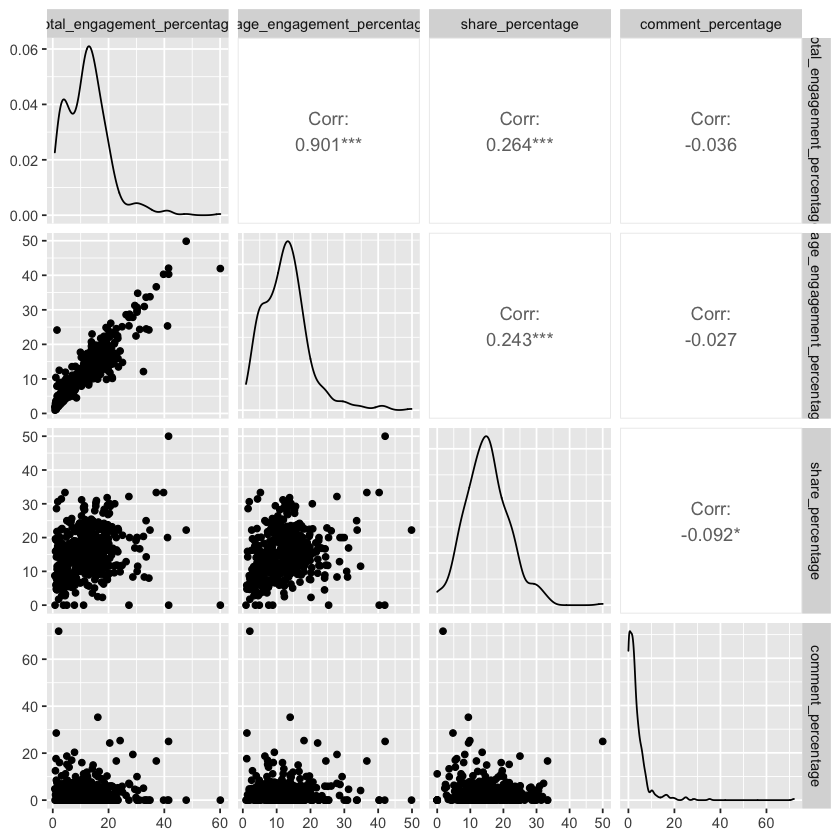

In [5]:
cleaned_facebook_data[, 1:4] %>%
  ggpairs(progress = FALSE)

From the pair plot of the numeric/continuous variables, we observe that the correlation between `total_engagement_percentage` and `page_engagement_percentage` have the highest correlation of 0.901

# Problem

- We would like to study determining factors associated with total engagement percentage.
- More specifically, we want to know the relation between total engagement percentage and page engagement percentage.

# Regression Models

## Simple Linear Regression

$$ \text{total\_engagement\_percentage}_i = \beta_0 + \beta_1 \times \text{page\_engagement\_percentage}_i + \varepsilon_i $$

In [6]:
# Simple linear regression
sl_reg <- lm(total_engagement_percentage ~ page_engagement_percentage,
             data = cleaned_facebook_data)
tidy_sl_reg <- tidy(sl_reg)
tidy_sl_reg

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.6703709,0.32465681,-2.06486,3.946390e-02
page_engagement_percentage,1.0288489,0.02245479,45.81867,6.925004e-179


## Multiple Linear Regression

$$ \text{total\_engagement\_percentage}_i = \beta_0 + \beta_1 \times \text{page\_engagement\_percentage}_i + \beta_2 \times \text{share\_percentage}_i + \beta_3 \times \text{comment\_percentage}_i + \varepsilon_i $$

In [7]:
# Multiple linear regression
ml_reg <- lm(total_engagement_percentage ~ page_engagement_percentage + 
             share_percentage + comment_percentage,
             data = cleaned_facebook_data
)
tidy_ml_reg <- tidy(ml_reg)
tidy_ml_reg

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.29944131,0.45317392,-2.8674230,4.318085e-03
page_engagement_percentage,1.01555375,0.02306122,44.0372868,9.164255e-172
share_percentage,0.05538985,0.02385007,2.3224191,2.062257e-02
comment_percentage,-0.01110856,0.02957942,-0.3755503,7.074151e-01


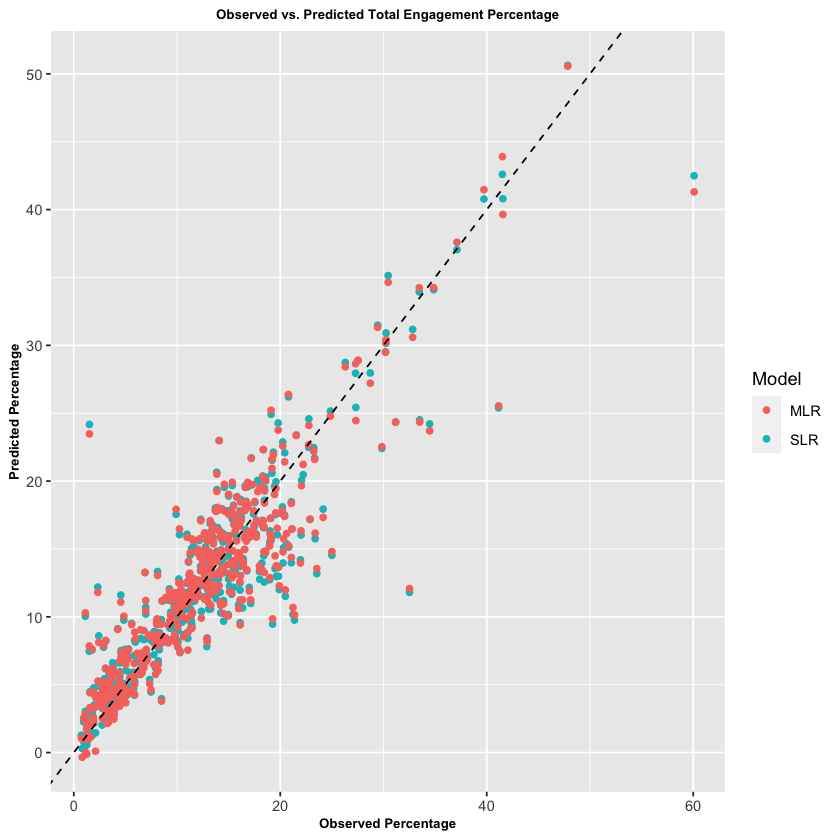

In [8]:
predicted_response <- cleaned_facebook_data %>%
  mutate(
    SLR = predict(sl_reg),
    MLR = predict(ml_reg)) %>%
  select(total_engagement_percentage, SLR, MLR) %>%
  gather(Model, predicted_percentage, SLR, MLR)

prediction_plot <- ggplot(predicted_response, aes(
  x = total_engagement_percentage,
  y = predicted_percentage,
  color = Model)) +
  geom_point() +
  labs(
    title = "Observed vs. Predicted Total Engagement Percentage",
    x = "Observed Percentage",
    y = "Predicted Percentage") +
  theme(
    plot.title = element_text(
      face = "bold", size = 8,
      hjust = 0.5
    ),
    axis.title = element_text(face = "bold", size = 8)) +
geom_abline(intercept = 0, slope = 1, linetype = "dashed")

prediction_plot

The additional comment and share percentages do not contribute much differences -- hence they might not be necessary, as suggested by the `tidy_ml_reg`

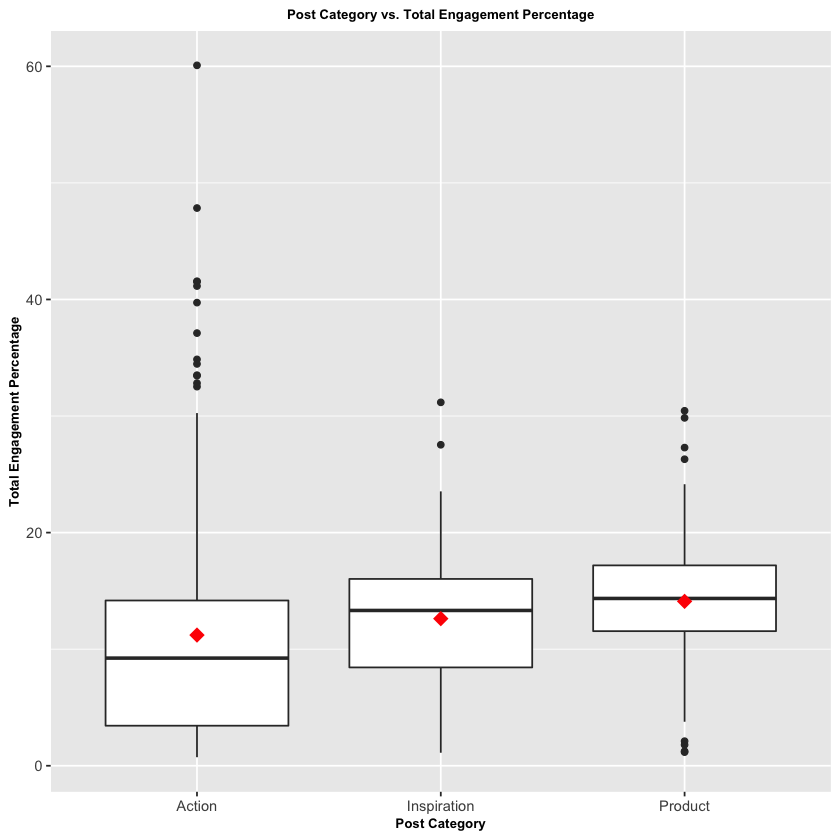

In [9]:
post_cat_plot <- ggplot(
  cleaned_facebook_data,
  aes(
    x = post_category, y = total_engagement_percentage,
    group = post_category
    )
  ) +
  geom_boxplot() +
  stat_summary(
    fun = mean, colour = "red", geom = "point",
    shape = 18, size = 4
  ) +
  labs(
    title = "Post Category vs. Total Engagement Percentage",
    x = "Post Category", y = "Total Engagement Percentage"
  ) +
  theme(
    plot.title = element_text(face = "bold", size = 8, hjust = 0.5),
    axis.title = element_text(face = "bold", size = 8)
  )
post_cat_plot